# Chronic Kidney Disease Prediction

# 1.Business Problem

## 1.1 Description

* scource: https://www.kaggle.com/mansoordaku/ckdisease
* data: Chronic kidney disease dataset from kaggle
* download: kidney_disease.csv from kaggle

### Problem Statement:

Given 26 health related attributes of 400 patients, we need to predict whether one has chronic kidney disease or not.

## 1.2 Source or Reference

These are some reference papers i have read to better understand the problem.
https://www.researchgate.net/publication/322594167_Classification_of_Chronic_Kidney_Disease_with_Most_Known_Data_Mining_Methods
https://www.researchgate.net/publication/323227974_Prediction_of_Chronic_Kidney_Disease_Using_Data_Mining_Techniques

## 1.3 Business Objective and Constraints

* Errors can be very costly
* Interpretability is important
* Probability of datapoint belonging to each class is required

# 2. Machine learning problem formulation

## 2.1 Data

## 2.1.1 DataOverview

* The dataset contain 26 health related attributes which is taken from the various test reports that we can use to predict whether the person has chronic kidney disease(CKD) or not.
* we have dataset of 400 patients.

### Features:


![title](Images/featuretable.png)



## 2.2 Mapping the real world problem to ML problem

## 2.2.1 Type of machine learning problem

We have to predict whether the person has CKD or not.
So it is a binary classification problem.

## 2.2.2 Performance Metric

Metrics:
* Confusion Metric


## 2.2.3 Machine Learning Objectives

Objective: Predict the probability of each datapoint belonging to either CKD or not CKD.





# 3. Exploratory Data Analysis

In [2]:
## import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Miscellaneous
import re
import time
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from scipy.sparse import hstack
from nltk.corpus import stopwords

# Sklearn
from sklearn.preprocessing import normalize ## Scale input vectors to unit norm (vector length)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.calibration import CalibratedClassifierCV  ## Probability Caliberation

# Evaluation Metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [88]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [149]:
from sklearn.externals import joblib 

## 3.1 Reading Data

In [2]:
df=pd.read_csv('Files/kidney_disease.csv')

In [3]:
df.shape

(400, 26)

In [4]:
# displaying first 5 rows
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
# column name
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
# datatypes of all attributes
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

## 3.2 Distribution of numeric features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BA50EDDA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021BA57F5240>]], dtype=object)

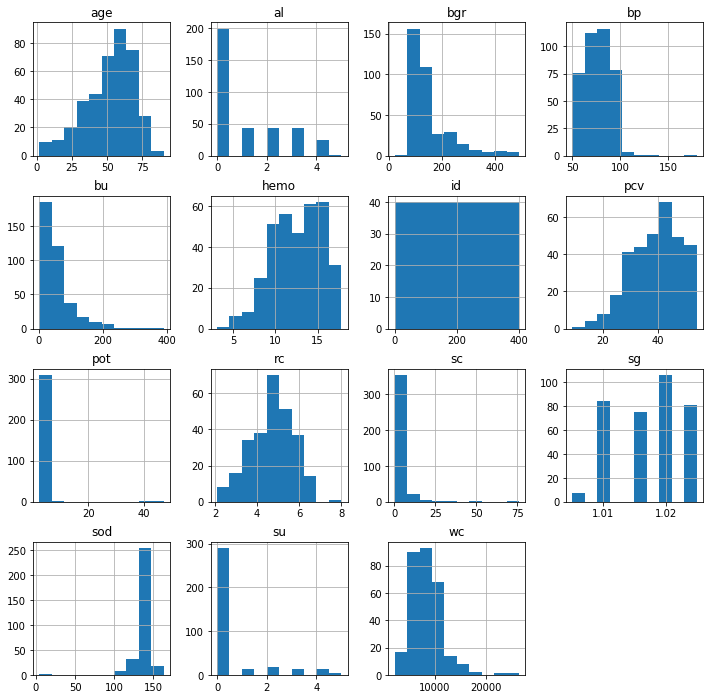

In [7]:
df.hist(figsize=(12,12))

Observations:
* the patients are mainly between age 40 to 80
* as we can see attribute id  doesnot make any sense here.


In [8]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


* By looking at the count value of above attributes we can see that there are some missing values.
* Also we have data of patients between age group 17 to 90.


## 3.3 Distribution of categorical features

In [9]:
df.describe(include=['object'])

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,258,362,317,323,339,248


* here classification has 3 unique values whereas it should have only 2 unique values ckd and not ckd. so there is a chance that there must be any typing errors.
* similarly in case of cad and dm

# 4.1 Data cleaning

## 4.1 Handling misslabelled classes and typing errors

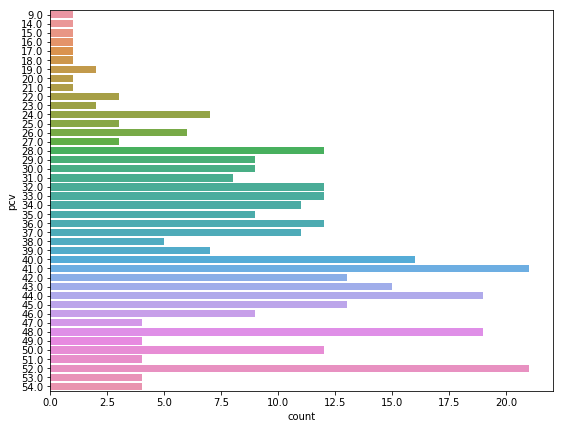

In [10]:
plt.figure(figsize=(9,7))
sns.countplot(y='pcv', data=df)

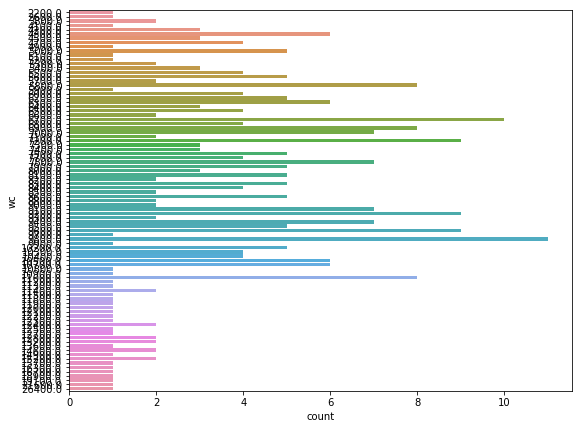

In [11]:
plt.figure(figsize=(9,7))
sns.countplot(y='wc', data=df)

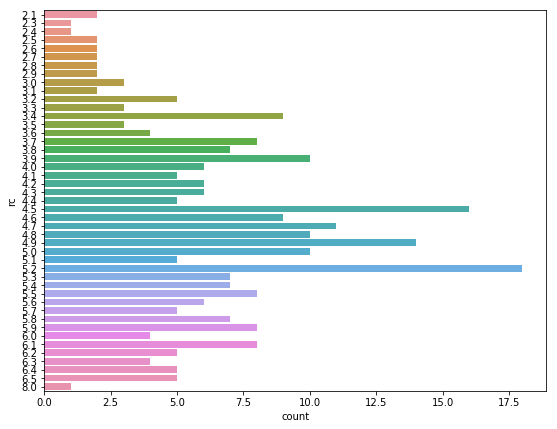

In [12]:
plt.figure(figsize=(9,7))
sns.countplot(y='rc', data=df)

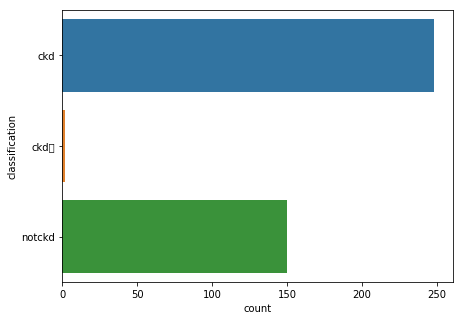

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(y='classification', data=df)

In [14]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [15]:
df.classification.replace('ckd\t', 'ckd', inplace=True)

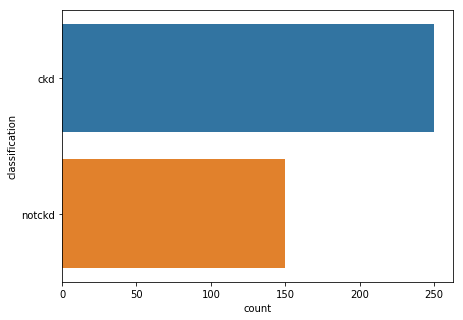

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(y='classification', data=df)

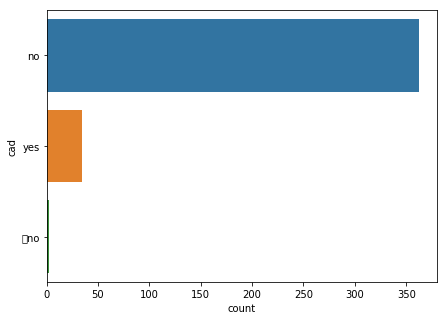

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(y='cad', data=df)

In [18]:
df.cad.unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [19]:
df.cad.replace('\tno','no', inplace=True)

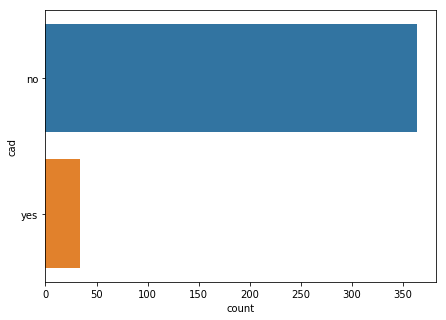

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(y='cad' , data=df)

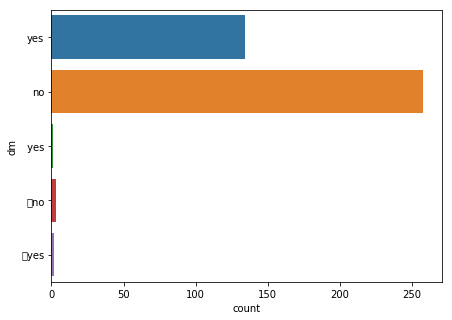

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(y='dm',data=df)

In [22]:
df.dm.unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [23]:
df.dm.replace('yes', 'yes', inplace=True)
df.dm.replace('\tno', 'no', inplace=True)
df.dm.replace('\tyes', 'yes', inplace=True)

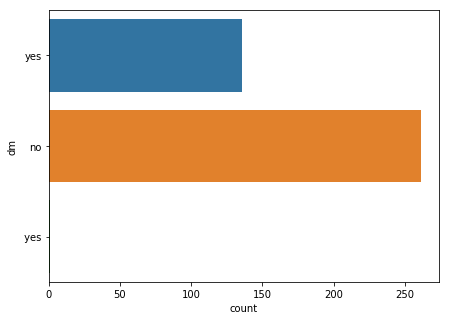

In [24]:
plt.figure(figsize=(7,5))
sns.countplot(y='dm',data=df)

In [25]:
df.dm.replace(' yes', 'yes', inplace=True)

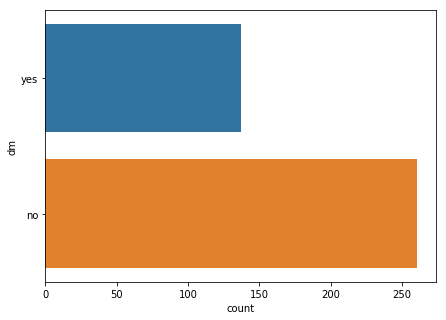

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(y='dm',data=df)

In [27]:
df.describe(include=['object'])

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,398,398,398,399,399,399,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,201,259,354,374,251,261,364,317,323,339,250


## 4.2 Finding outliers

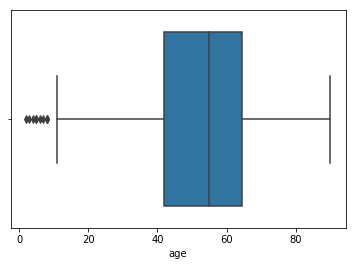

In [28]:
sns.boxplot(df.age)

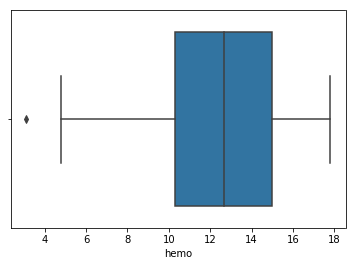

In [29]:
sns.boxplot(df.hemo)

Here the dots at the extreme left indicate outlier

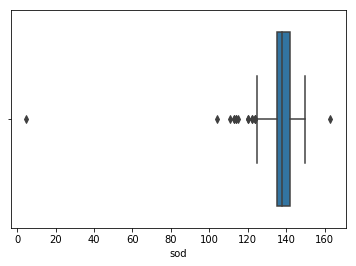

In [30]:
sns.boxplot(df.sod)

the points at both extreme ends indicate outliers

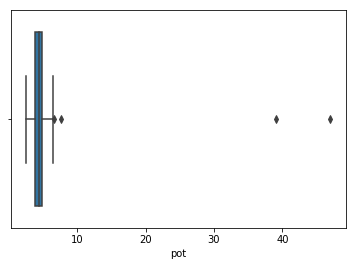

In [31]:
sns.boxplot(df.pot)

the points at extreme right indicate outlier

In [32]:
# saving work uptil now
df.to_csv('Files/ckd1.csv', index=None)

In [28]:
df=pd.read_csv('Files/ckd1.csv')

## 4.3 Removing unwantes attributes

In [29]:
df=df.drop(['id'],1)

In [30]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [31]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


## 4.4 Handling missing values

In [32]:
df.select_dtypes(include=['object']).isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

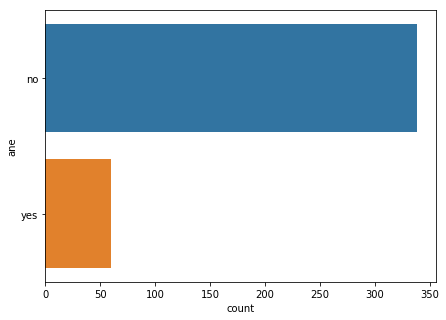

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(y='ane',data=df)

In [34]:
df['ane']=df['ane'].fillna('no')

In [35]:
df.select_dtypes(include=['object']).isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 0
classification      0
dtype: int64

* here ane had missing value so we plot the count plot and get to know that the maximum value is 'no'.
* so we replace all missing value in ane with 'no'.
* similarly we can do it for pcc,ba,htn,dm,cad,appet and pe.

In [36]:
df['pe']=df['pe'].fillna('no')
df['cad']=df['cad'].fillna('no')
df['dm']=df['dm'].fillna('no')
df['htn']=df['htn'].fillna('no')
df['appet']=df['appet'].fillna('good')
df['ba']=df['ba'].fillna('not present')
df['pcc']=df['pcc'].fillna('not present')

In [37]:
df.select_dtypes(include=['object']).isnull().sum()

rbc               152
pc                 65
pcc                 0
ba                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [38]:
df.select_dtypes(exclude=['object']).isnull().sum()

age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

* since all the above missing values are large and it is very important that these values should be correct.
* also we cannot delete the rows containing missing values since our data is small(400 data points)
* But we have to fill all the missing values so, replacing all missing values with mean. 

# 5. Cleaning and preprocessing

In [39]:
# reference 'https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease' 
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1.0,'no':0.0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1.0,'normal':0.0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1.0,'notpresent':0.0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1.0,'poor':0.0,'no':np.nan})

In [40]:
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'notckd':0.0})

In [41]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0,0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0,0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0,0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1,0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0,0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0,0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,NaN,0.0,0,0,100.0,...,36.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,NaN,1.015,2.0,4.0,0.0,1.0,0,0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1,0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1,0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [42]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification    float64
dtype: object

here pcc and ba are still objects. 

In [43]:
df.pcc.unique()

array([0.0, 1.0, 'not present'], dtype=object)

In [44]:
df.pcc.replace('not present', 0.0, inplace=True)

In [45]:
df.pcc.unique()

array([ 0.,  1.])

In [46]:
df.ba.unique()

array([0.0, 1.0, 'not present'], dtype=object)

In [47]:
df.ba.replace('not present', 0.0,inplace=True)

In [48]:
df.ba.unique()

array([ 0.,  1.])

In [49]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification    float64
dtype: object

now all values are of type float

* filling missing values with mean.

In [55]:
df ["age"] = df ["age"].fillna(df ["age"].mean() )

In [60]:
df ["bp"] = df ["bp"].fillna(df ["bp"].mean() )
df ["sg"] = df ["sg"].fillna(df ["sg"].mean() )
df ["al"] = df ["al"].fillna(df ["al"].mean() )
df ["su"] = df ["su"].fillna(df ["su"].mean() )
df ["rbc"] = df ["rbc"].fillna(df ["rbc"].mean() )
df ["pc"] = df ["pc"].fillna(df ["pc"].mean() )
df ["pcc"] = df ["pcc"].fillna(df ["pcc"].mean() )
df ["ba"] = df ["ba"].fillna(df ["ba"].mean() )
df ["bgr"] = df ["bgr"].fillna(df ["bgr"].mean() )
df ["bu"] = df ["bu"].fillna(df ["bu"].mean() )
df ["sc"] = df ["sc"].fillna(df ["sc"].mean() )
df ["sod"] = df ["sod"].fillna(df ["sod"].mean() )
df ["pot"] = df ["pot"].fillna(df ["pot"].mean() )
df ["hemo"] = df ["hemo"].fillna(df ["hemo"].mean() )
df ["pcv"] = df ["pcv"].fillna(df ["pcv"].mean() )
df ["wc"] = df ["wc"].fillna(df ["wc"].mean() )
df ["rc"] = df ["rc"].fillna(df ["rc"].mean() )


In [61]:
df.select_dtypes(exclude=['object']).isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

* now there are no missing values.

In [63]:
# saving work uptil now
df.to_csv('Files/ckd2.csv', index=None)

In [64]:
df=pd.read_csv('Files/ckd2.csv')

# 6. Machine Learning Models

In [65]:
df.shape

(400, 25)

## 6.1 Train and Test split

In [66]:
X = df.drop(['classification'], axis=1).values
y = df['classification'].values

In [67]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=df.classification)

In [68]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 24) (80, 24) (320,) (80,)


## 6.2 Data standardization

In [69]:
train_mean = X_train.mean()
train_std = X_train.std()

In [71]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [72]:
## Checking for mean and std dev.
X_train

array([[-0.1843246 , -0.16155633, -0.21221004, ..., -0.21278494,
        -0.21221573, -0.21221573],
       [-0.1843246 , -0.1672484 , -0.21220435, ..., -0.21221573,
        -0.21278494, -0.21278494],
       [-0.18887825, -0.17294046, -0.21220435, ..., -0.21221573,
        -0.21278494, -0.21278494],
       ..., 
       [-0.17692491, -0.15586426, -0.21221004, ..., -0.21221573,
        -0.21278494, -0.21278494],
       [-0.1928627 , -0.17863253, -0.2122015 , ..., -0.21221573,
        -0.21278494, -0.21278494],
       [-0.19912397, -0.16925822, -0.21220719, ..., -0.21221573,
        -0.21221573, -0.21278494]])

In [73]:
# using train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [75]:
## Check for mean and std deviation
X_test

array([[-0.18090936, -0.17294046, -0.2122015 , ..., -0.21221573,
        -0.21278494, -0.21278494],
       [-0.19570873, -0.1672484 , -0.2122015 , ..., -0.21221573,
        -0.21278494, -0.21278494],
       [-0.18603222, -0.1672484 , -0.21220582, ..., -0.21221573,
        -0.21278494, -0.21278494],
       ..., 
       [-0.18546301, -0.15017219, -0.21220719, ..., -0.21221573,
        -0.21278494, -0.21221573],
       [-0.19855477, -0.1672484 , -0.2122015 , ..., -0.21221573,
        -0.21278494, -0.21278494],
       [-0.2093697 , -0.17863253, -0.21221004, ..., -0.21278494,
        -0.21278494, -0.21278494]])

## 6.3 Models

## 6.3.1 Baseline model

In [78]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [79]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()

In [85]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  0.4841229182759271
R-squared:  0.0
Mean Absolute Error:  0.46875


In [86]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  0.4841229182759271
R-squared:  0.0
Mean Absolute Error:  0.46875


In [89]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

37.5

In [90]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[30, 50],
       [ 0,  0]], dtype=int64)

## 6.3.2 Ridge regression

In [95]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [96]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
y_train_pred = model.predict(X_train)

In [98]:
y_pred = model.predict(X_test)

In [100]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  0.27288272806351693
R-squared:  0.682282738025
Mean Absolute Error:  0.229750603324


In [101]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  0.3801637511292566
R-squared:  0.383362228597
Mean Absolute Error:  0.317599375546


In [102]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

53.75

In [103]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[30, 36,  0],
       [ 0, 13,  0],
       [ 0,  1,  0]], dtype=int64)

## 6.3.3 Support vector regression

In [106]:
tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [107]:
model.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [108]:
model = SVR(C=1, gamma=0.1)
model.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [109]:
y_train_pred = model.predict(X_train)

In [110]:
y_pred = model.predict(X_test)

In [112]:
print("Train Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))


Train Results for Support Vector Regression:
*******************************
Root mean squared error:  0.4838501819513764
R-squared:  0.00112640608265
Mean Absolute Error:  0.355619169131


In [113]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Support Vector Regression:
*******************************
Root mean squared error:  0.5755646278595811
R-squared:  -0.413438467597
Mean Absolute Error:  0.455134012876


In [115]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

42.5

In [116]:
confusion_matrix(y_test, y_pred.astype(int)).T

array([[30, 46],
       [ 0,  4]], dtype=int64)

## 6.3.4 Random forest classifier

In [117]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_absolute_error',
          verbose=0)

In [118]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
y_train_pred = model.predict(X_train)

In [120]:
y_pred = model.predict(X_test)

In [122]:
print("Train Results for Random Forest Classifier:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train, y_train_pred)))
print("R-squared: ", r2_score(y_train, y_train_pred))
print("Mean Absolute Error: ", mae(y_train, y_train_pred))

Train Results for Random Forest Classifier:
*******************************
Root mean squared error:  0.0
R-squared:  1.0
Mean Absolute Error:  0.0


In [123]:
print("Test Results for Random Forest Classifier:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Random Forest Classifier:
*******************************
Root mean squared error:  0.19364916731037085
R-squared:  0.84
Mean Absolute Error:  0.0375


In [127]:
acc=accuracy_score(y_test,y_pred.astype(int),normalize=True)*float(100)
acc

96.25

In [128]:
confusion_matrix(y_test, y_pred).T

array([[27,  0],
       [ 3, 50]], dtype=int64)

## Results:

![title](Images/resulttable.png)

## 7. Saving Winning Model

In [150]:
win_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'Files/CKD.pkl') 

['Files/CKD.pkl']